# Predicting Age Of Image By CNN

### Group Member:

- **Aesha Bakheet Aljohani**

## install

In [2]:
#!pip install tensorflow

## Importing Libraries 

In [27]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [4]:
data=pd.read_csv('age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [30]:
data.tail()

,age,ethnicity,gender,img_name,pixels
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, ..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85..."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 10..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140..."
23704,99,0,1,20170110182052119.jpg.chip.jpg,"[[156.0, 161.0, 160.0, 165.0, 170.0, 173.0, 16..."


In [28]:
data.shape

(23705, 5)

In [29]:
# check the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


## Cleaning Data

In [31]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [32]:
#Finding missing data and the percentage of it in each column
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data

,Total_NaN,Percent_Nan
pixels,0,0.0
img_name,0,0.0
gender,0,0.0
ethnicity,0,0.0
age,0,0.0


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


In [5]:
def values_to_array(pixels):
    arr=np.array(pixels.split(),'float64')
    arr=arr.reshape(48,48)
#     print(arr.shape)
    return arr
data['pixels']=data['pixels'].apply(values_to_array)

## Train test spliting of data

In [6]:
train_img,test_img,train_age,test_age=train_test_split(data['pixels'],data['age'],test_size=0.2,random_state=42)

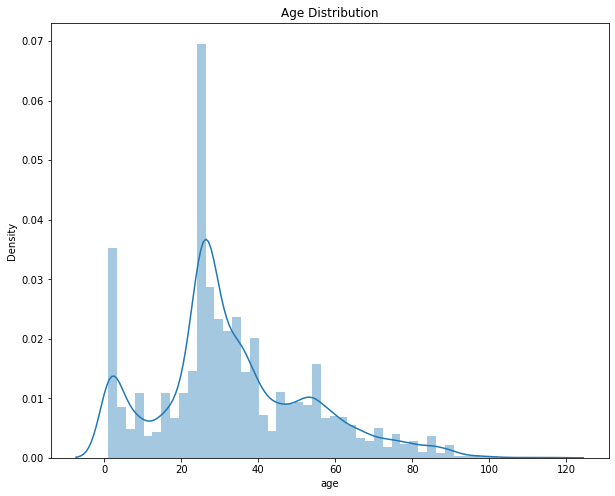

In [7]:
#Data Visualization
plt.figure(figsize=(10,8))
sns.distplot(train_age)
plt.title('Age Distribution')
plt.show()

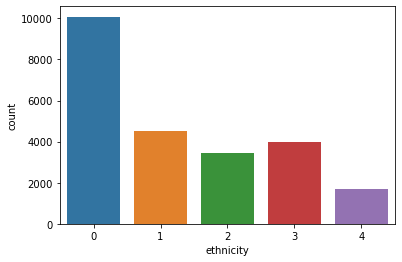

In [37]:
sns.countplot(data['ethnicity']);

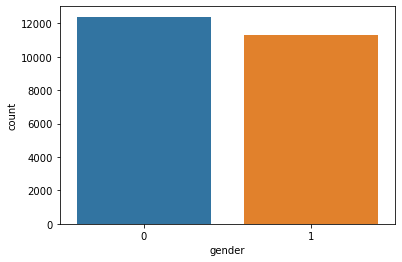

In [38]:
sns.countplot(data['gender']);

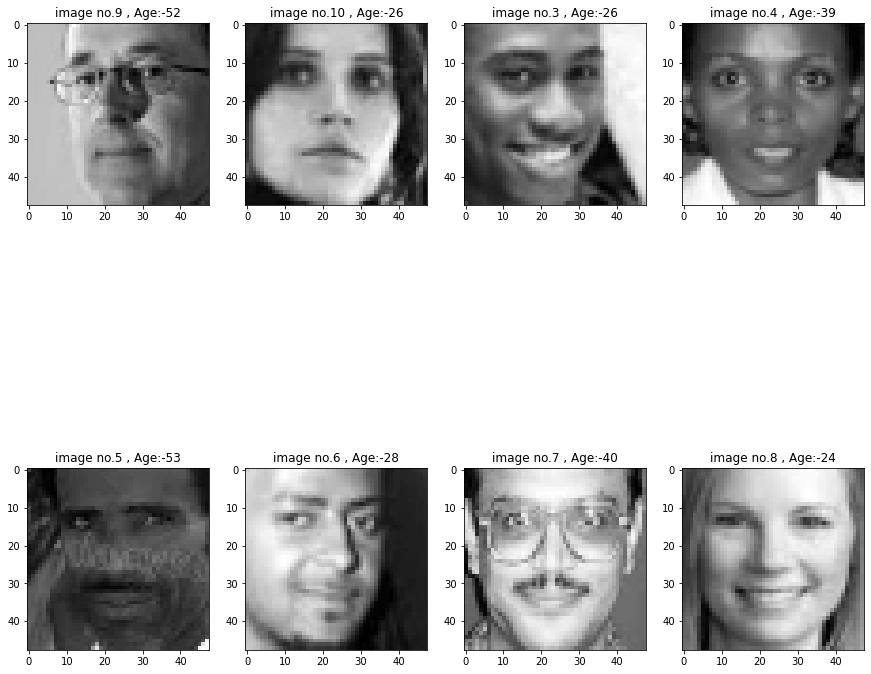

In [8]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(2,4,(i%8)+1)
    num=np.random.randint(1000)
    plt.title("image no.{0} , Age:-{1}".format(i+1,train_age.iloc[num]))
    plt.imshow(train_img.iloc[num],cmap='gray')
plt.show()

In [9]:
#Changing Dimension Of Data
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),48,48,1))
    return data

In [10]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

## Callback Functions

In [11]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop=EarlyStopping(monitor='val_mean_absolute_error',patience=2)
learning_rate_scheduler=LearningRateScheduler(schedule)
reduceLR=ReduceLROnPlateau(monitor='val_mean_absolute_error',patience=1,min_lr=0.00001)

## Convolutional Neural Network

In [12]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [13]:
model.compile(optimizer='adam',loss='mse',metrics=[keras.metrics.mean_absolute_error])
r=model.fit(train_img,train_age,validation_data=(test_img,test_age),epochs=15,callbacks=[reduceLR])

Epoch 1/15
593/593 [==============================] - 186s 308ms/step - loss: 172.7486 - mean_absolute_error: 9.5138 - val_loss: 1700.6460 - val_mean_absolute_error: 38.7431 - lr: 0.0010
Epoch 2/15
593/593 [==============================] - 186s 313ms/step - loss: 97.7990 - mean_absolute_error: 7.2485 - val_loss: 137.5763 - val_mean_absolute_error: 8.2760 - lr: 0.0010
Epoch 3/15
593/593 [==============================] - 186s 314ms/step - loss: 80.0305 - mean_absolute_error: 6.5947 - val_loss: 565.9373 - val_mean_absolute_error: 18.7328 - lr: 0.0010
Epoch 4/15
593/593 [==============================] - 326s 550ms/step - loss: 57.7613 - mean_absolute_error: 5.6345 - val_loss: 78.3689 - val_mean_absolute_error: 6.3828 - lr: 1.0000e-04
Epoch 5/15
593/593 [==============================] - 188s 317ms/step - loss: 52.4415 - mean_absolute_error: 5.3907 - val_loss: 93.4910 - val_mean_absolute_error: 7.2691 - lr: 1.0000e-04
Epoch 6/15
593/593 [==============================] - 188s 317ms/step 

## Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

## Curve of Mean Squared Error Losses

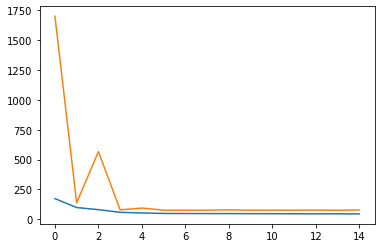

In [15]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

## Curve of Absolute Mean Error Losses

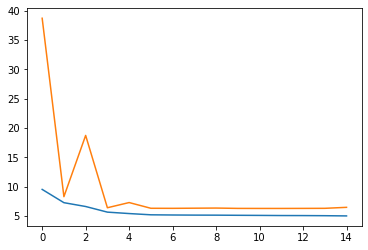

In [16]:
plt.plot(r.history['mean_absolute_error'])
plt.plot(r.history['val_mean_absolute_error'])

## Visualizing Train Data Prediction

In [17]:
pred_train_Age=model.predict(train_img)
train_age=np.array(train_age,'int32')
pred_train_Age=np.reshape(pred_train_Age,(len(train_age),))
train_age=np.reshape(train_age,(len(train_age),))
train_images=np.reshape(train_img,(len(train_img),48,48))

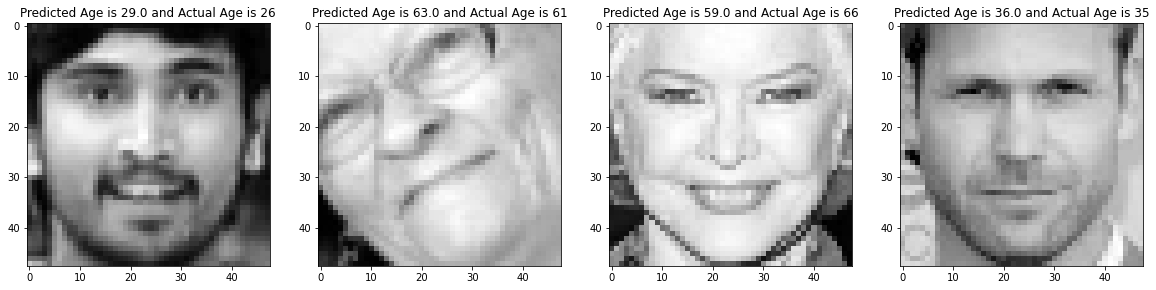

In [18]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_train_Age[i]),train_age[i]))
    plt.imshow(train_images[i],cmap='gray')
plt.show()

## Visualizing Test Data Prediction

In [19]:
pred_test_Age=model.predict(test_img)
test_age=np.array(test_age,'int32')
pred_test_Age=np.reshape(pred_test_Age,(len(test_age),))
test_age=np.reshape(test_age,(len(test_age),))
test_images=np.reshape(test_img,(len(test_img),48,48))

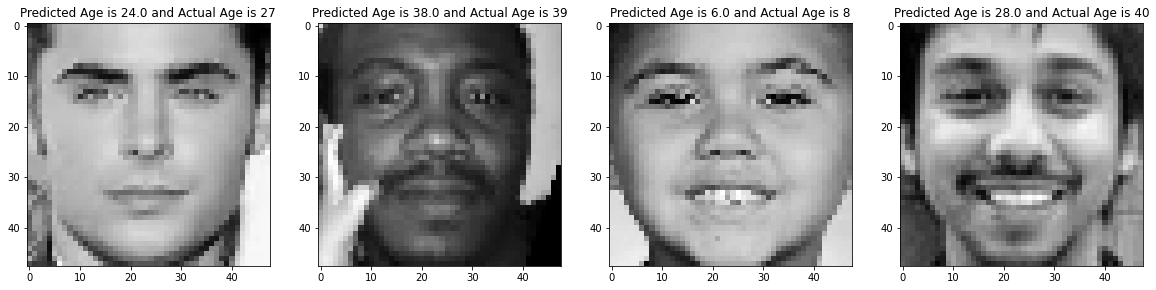

In [20]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_test_Age[i]),test_age[i]))
    plt.imshow(test_images[i],cmap='gray')
plt.show()

## Thank You